In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel (r'C:\Users\admin\Documents\Power BI\Dental Camp.xlsx')


In [3]:
df.head()

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62.0,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94.0,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90.0,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81.0,Crown,No
4,21962,F,Single,Allison,CO,81137,45.0,Extraction,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient ID           99 non-null     int64  
 1   Gender               99 non-null     object 
 2   Marital Status       99 non-null     object 
 3   City                 99 non-null     object 
 4   State                99 non-null     object 
 5   Zip Code             99 non-null     int64  
 6   Age                  99 non-null     float64
 7   Procedure            99 non-null     object 
 8   Follow-up Attended?  99 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.1+ KB


In [5]:
df.rename(columns={"Follow-up Attended?":"Attended"},inplace = True)
df.head()


,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Attended
0,11234,M,Married,Allison,CO,81137,62.0,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94.0,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90.0,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81.0,Crown,No
4,21962,F,Single,Allison,CO,81137,45.0,Extraction,Yes


## Getting unique values of a column

In [6]:
print("Unique values in Gender : ",df["Gender"].unique())
print("Unique values in Marital Status : ",df["Marital Status"].unique())
print("Unique values in City : ",df["City"].unique())
print("Unique values in State : ",df["State"].unique())
print("Unique values in Zip Code : ",df["Zip Code"].unique())
print("Unique values in Procedure : ",df["Procedure"].unique())
print("Unique values in Attended : ",df["Attended"].unique())



Unique values in Gender :  ['M' 'F' 'T' 'NC' 'P']
Unique values in Marital Status :  ['Married' 'Single' 'Divorced' 'Widowed' 'Partnership']
Unique values in City :  ['Allison' 'Southern Ute']
Unique values in State :  ['CO']
Unique values in Zip Code :  [81137]
Unique values in Procedure :  ['Extraction' 'Crown' 'Emergency Surgery' 'Implant' 'Veneers']
Unique values in Attended :  ['Yes' 'No']


## Definition of Procedure column in the dataset

Extraction : A tooth extraction is a procedure to remove a tooth from the gum socket.

Crown : crown refers to the anatomical area of teeth, usually covered by enamel

Emergency surgery : Surgery

Implant : A dental implant is a metal post that replaces the root portion of a missing tooth

Veneers : Dental veneers (sometimes called porcelain veneers or dental porcelain laminates) are wafer-thin, custom-made shells of tooth-colored materials designed to cover the front surface of teeth to improve your appearance.

## Counting and replacing need values in a column

In [7]:
df['Gender'].value_counts()

F     49
M     42
T      4
NC     3
P      1
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace(['NC'],'F')
df['Gender'] = df['Gender'].replace(['P'],'F')


In [9]:
df['Gender'].value_counts()

F    53
M    42
T     4
Name: Gender, dtype: int64

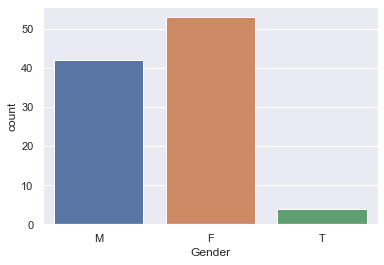

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=df)

In [11]:
df['City'].value_counts()

Allison         74
Southern Ute    25
Name: City, dtype: int64

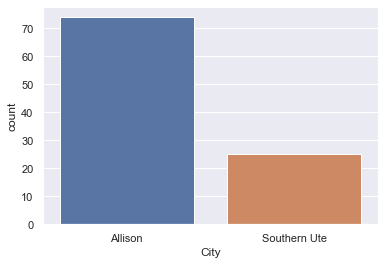

In [12]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="City", data=df)

In [13]:
df['Marital Status'].value_counts()

Single         27
Married        25
Widowed        21
Divorced       18
Partnership     8
Name: Marital Status, dtype: int64

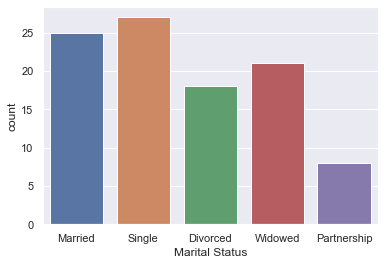

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Marital Status", data=df)

In [15]:
df['Procedure'].value_counts()

Extraction           53
Crown                22
Implant              13
Emergency Surgery    10
Veneers               1
Name: Procedure, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Extraction'),
  Text(1, 0, 'Crown'),
  Text(2, 0, 'Emergency Surgery'),
  Text(3, 0, 'Implant'),
  Text(4, 0, 'Veneers')])

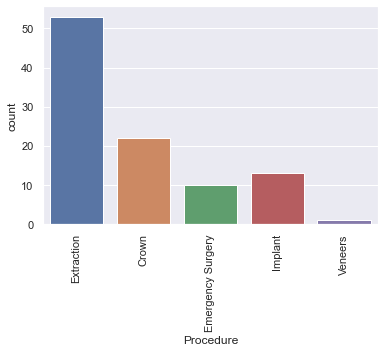

In [16]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Procedure", data=df)
plt.xticks(rotation=90)

In [17]:
df['Attended'].value_counts()

Yes    52
No     47
Name: Attended, dtype: int64

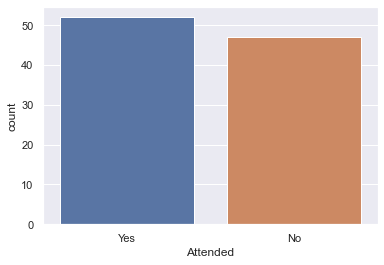

In [18]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Attended", data=df)

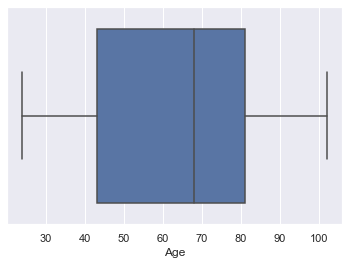

In [19]:
ax = sns.boxplot(x=df["Age"])


## Finding yes/no in each column

<AxesSubplot:title={'center':'Yes/No in Marital Status column'}, xlabel='Marital Status'>

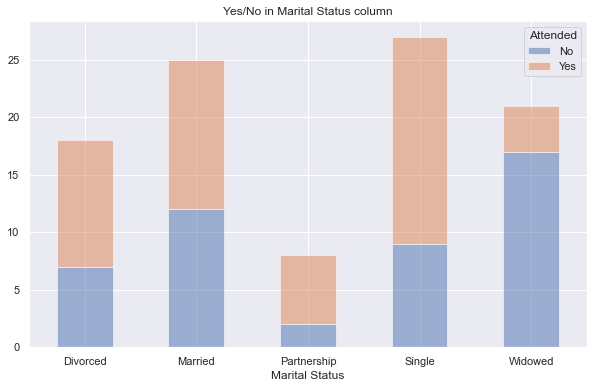

In [20]:
pd.crosstab(index = df["Marital Status"],columns = df["Attended"]).plot(kind='bar',
 figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Yes/No in Marital Status column")

<AxesSubplot:title={'center':'Yes/No in Gender column'}, xlabel='Gender'>

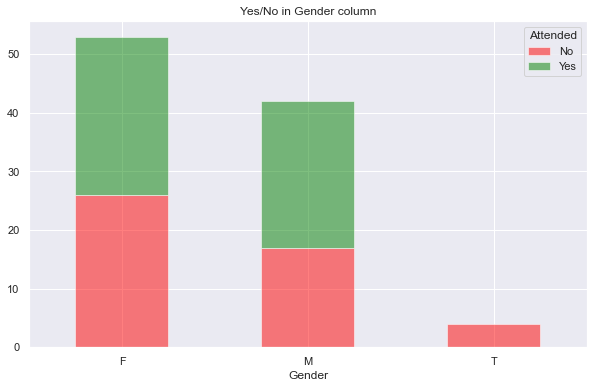

In [21]:
pd.crosstab(index = df["Gender"],columns = df["Attended"]).plot(kind='bar',
 figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Yes/No in Gender column",color=['red','green'])

<AxesSubplot:title={'center':'Yes/No in City column'}, xlabel='City'>

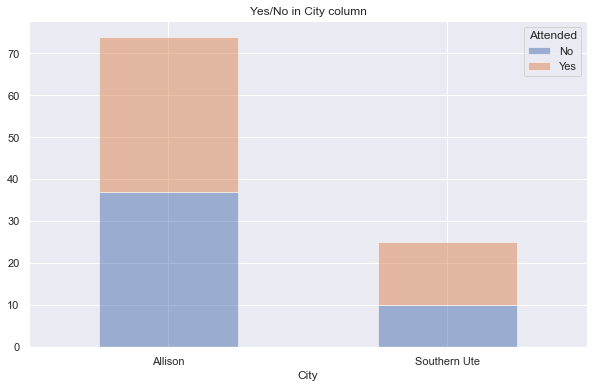

In [22]:
pd.crosstab(index = df["City"],columns = df["Attended"]).plot(kind='bar',
 figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Yes/No in City column")

<AxesSubplot:title={'center':'Yes/No in Procedure column'}, xlabel='Procedure'>

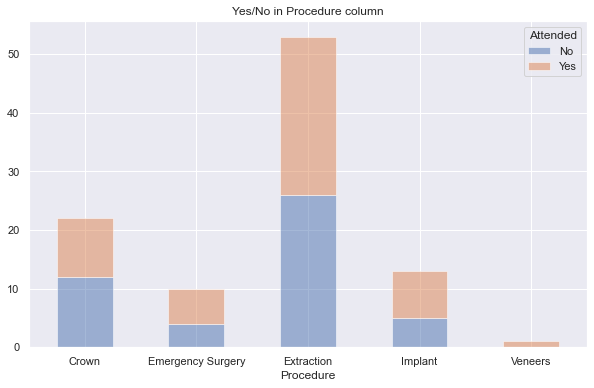

In [23]:
pd.crosstab(index = df["Procedure"],columns = df["Attended"]).plot(kind='bar',
 figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Yes/No in Procedure column")

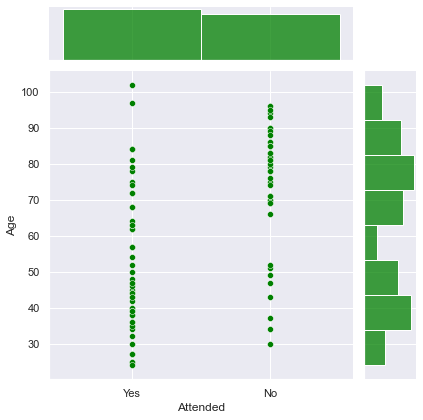

In [24]:
sns.jointplot(x='Attended',y='Age',data=df,color = 'green')

<AxesSubplot:title={'center':'Gender vs Procedure'}, xlabel='Gender'>

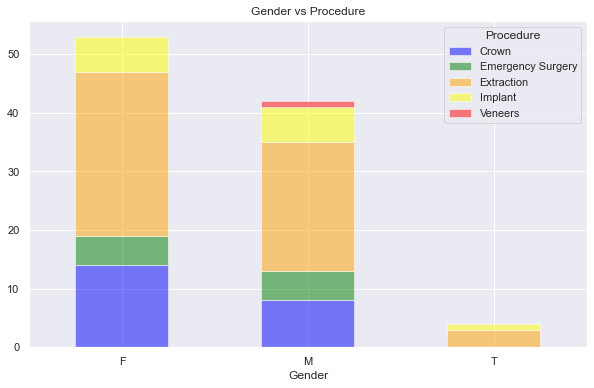

In [25]:
pd.crosstab(index = df["Gender"],columns = df["Procedure"]).plot(kind='bar',
 figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Gender vs Procedure",color=['blue','green','orange','yellow','red'])

# Machine learning

In [26]:
df.drop(['Patient ID','Zip Code','City','State'], inplace=True, axis=1)


In [27]:
df.head()

,Gender,Marital Status,Age,Procedure,Attended
0,M,Married,62.0,Extraction,Yes
1,F,Single,94.0,Extraction,No
2,M,Divorced,90.0,Extraction,No
3,F,Widowed,81.0,Crown,No
4,F,Single,45.0,Extraction,Yes


In [28]:
df=pd.get_dummies(df)


In [29]:
df.head()

,Age,Gender_F,Gender_M,Gender_T,Marital Status_Divorced,Marital Status_Married,Marital Status_Partnership,Marital Status_Single,Marital Status_Widowed,Procedure_Crown,Procedure_Emergency Surgery,Procedure_Extraction,Procedure_Implant,Procedure_Veneers,Attended_No,Attended_Yes
0,62.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
1,94.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,90.0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,81.0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
4,45.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [30]:
df.rename(columns={"Gender_F":"Female",'Gender_M':'Male','Gender_T':'Transgender','Marital Status_Divorced':'Divorced',
                  'Marital Status_Married':'Married','Marital Status_Partnership':'Patnership','Marital Status_Single':'Single',
                  'Marital Status_Widowed':'Widowed','Procedure_Crown':'Crown','Procedure_Emergency Surgery':'Surgery',
                  'Procedure_Extraction':'Extraction','Procedure_Implant':'Implant','Procedure_Veneers':'Veneers',
                  'Attended_Yes':'Yes'},inplace = True)
df.head()


,Age,Female,Male,Transgender,Divorced,Married,Patnership,Single,Widowed,Crown,Surgery,Extraction,Implant,Veneers,Attended_No,Yes
0,62.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
1,94.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,90.0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,81.0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
4,45.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [31]:
df.drop(['Attended_No'], inplace=True, axis=1)


In [32]:
df.head()

,Age,Female,Male,Transgender,Divorced,Married,Patnership,Single,Widowed,Crown,Surgery,Extraction,Implant,Veneers,Yes
0,62.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,94.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,90.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,81.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,45.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [33]:
df['Age'].max()

102.0

In [34]:
df['Age']=df['Age']/102

In [35]:
df.head()

,Age,Female,Male,Transgender,Divorced,Married,Patnership,Single,Widowed,Crown,Surgery,Extraction,Implant,Veneers,Yes
0,0.607843,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,0.921569,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.882353,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0.794118,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0.441176,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [38]:
y = df['Yes'].values
print(y)

[1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1]


In [40]:
X =df.drop(['Yes'], axis = 1)
X

,Age,Female,Male,Transgender,Divorced,Married,Patnership,Single,Widowed,Crown,Surgery,Extraction,Implant,Veneers
0,0.607843,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0.921569,1,0,0,0,0,0,1,0,0,0,1,0,0
2,0.882353,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.794118,1,0,0,0,0,0,0,1,1,0,0,0,0
4,0.441176,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.764706,0,0,1,0,0,0,0,1,0,0,1,0,0
95,0.352941,1,0,0,0,0,1,0,0,0,1,0,0,0
96,0.372549,0,1,0,0,0,0,1,0,0,0,1,0,0
97,0.382353,1,0,0,0,0,0,1,0,0,1,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
print(x_train.shape)

(79, 14)


In [43]:
print(y_train.shape)

(79,)


In [44]:
print(x_test.shape)
print(y_test.shape)

(20, 14)
(20,)


In [45]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
pred = model.predict(x_test)
pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [49]:
print(y_test)

[1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1]


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)

[[4 6]
 [3 7]]


In [55]:
print("Accuracy: ",((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

Accuracy:  0.55


In [56]:
score = model.score(x_test,y_test)
print(score)

0.55
